In [1]:
import numpy as np
import pandas as pd


import datetime
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cab = pd.read_csv('Cab_Data.csv')
df_city = pd.read_csv('City.csv')
df_customerid = pd.read_csv('Customer_ID.csv')

df_transid = pd.read_csv('Transaction_ID.csv')


In [3]:
df_cab.info()
df_city.info()
df_customerid.info()
df_transid.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

df_cab_data = df_cab.merge(df_transid, how='outer').merge(df_customerid, how='outer').merge(df_city, how='outer')

df_cab_data.columns=df_cab_data.columns.str.replace(" ","_")
df_cab_data.Population=df_cab_data.Population.str.replace(",","")
df_cab_data.Users=df_cab_data.Users.str.replace("," , "")


df_cab_data.rename(columns={'Income_(USD/Month)': 'Income'},inplace=True)


In [4]:
df1=df_cab.merge(df_transid, how='left',on="Transaction ID")
df2=df1.merge(df_customerid,how='left',on ="Customer ID")
df3=df2.merge(df_city,how='left', on = "City")

In [5]:
df3.columns=df3.columns.str.replace(" ","_")
df3.Population=df3.Population.str.replace(",","")
df3.Users=df3.Users.str.replace("," , "")


df3.rename(columns={'Income_(USD/Month)': 'Income'},inplace=True)


In [6]:
df3

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income,Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001


In [7]:
df3['Date_of_Travel']=pd.to_datetime(df3['Date_of_Travel'],dayfirst=True)


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  359392 non-null  int64         
 1   Date_of_Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM_Travelled    359392 non-null  float64       
 5   Price_Charged   359392 non-null  float64       
 6   Cost_of_Trip    359392 non-null  float64       
 7   Customer_ID     359392 non-null  int64         
 8   Payment_Mode    359392 non-null  object        
 9   Gender          359392 non-null  object        
 10  Age             359392 non-null  int64         
 11  Income          359392 non-null  int64         
 12  Population      359392 non-null  object        
 13  Users           359392 non-null  object        
dtypes: datetime64[ns](1), float64(3), in

In [9]:
df3['Population']= pd.to_numeric(df3['Population']).astype(int)
df3['Users']= pd.to_numeric(df3['Users']).astype(int)
df3['Cost_of_Trip']= pd.to_numeric(df3['Cost_of_Trip']).astype(float).round(2)
df3['Company']=df3['Company'].astype('category')
df3['Payment_Mode']=df3['Payment_Mode'].astype('category')
df3['Gender']=df3['Gender'].astype('category')
df3['City']=df3['City'].astype('category')

In [10]:
df3


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392,Cash,Male,24,15651,418859,127001
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286,Cash,Male,32,6528,418859,127001
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265,Cash,Male,56,7966,418859,127001
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175,Card,Male,32,6423,418859,127001


In [11]:

### if needed later
months=[]
years =[]
for i in range(len(df3['Date_of_Travel'])):
    months.append(df3['Date_of_Travel'][i].month)
    years.append(df3['Date_of_Travel'][i].year)
df3['Month'] = months
df3['Year'] = years

df3.drop('Date_of_Travel', axis=1, inplace=True)


In [12]:
df3.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income,Population,Users,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card,Male,28,10813,814885,24701,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237,814885,24701,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash,Male,53,11242,814885,24701,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash,Male,23,23327,814885,24701,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card,Male,33,8536,814885,24701,1,2016


In [13]:
df3.dropna()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income,Population,Users,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card,Male,28,10813,814885,24701,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237,814885,24701,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash,Male,53,11242,814885,24701,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash,Male,23,23327,814885,24701,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card,Male,33,8536,814885,24701,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392,Cash,Male,24,15651,418859,127001,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286,Cash,Male,32,6528,418859,127001,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265,Cash,Male,56,7966,418859,127001,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175,Card,Male,32,6423,418859,127001,1,2018


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Transaction_ID  359392 non-null  int64   
 1   Company         359392 non-null  category
 2   City            359392 non-null  category
 3   KM_Travelled    359392 non-null  float64 
 4   Price_Charged   359392 non-null  float64 
 5   Cost_of_Trip    359392 non-null  float64 
 6   Customer_ID     359392 non-null  int64   
 7   Payment_Mode    359392 non-null  category
 8   Gender          359392 non-null  category
 9   Age             359392 non-null  int64   
 10  Income          359392 non-null  int64   
 11  Population      359392 non-null  int32   
 12  Users           359392 non-null  int32   
 13  Month           359392 non-null  int64   
 14  Year            359392 non-null  int64   
dtypes: category(4), float64(3), int32(2), int64(6)
memory usage: 39.6 MB


In [15]:
df3[["KM_Travelled","Price_Charged","Cost_of_Trip","Income","Population","Users"]].describe()

,KM_Travelled,Price_Charged,Cost_of_Trip,Income,Population,Users
count,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,22.567254,423.443311,286.190115,15048.822937,3.132198e+06,158365.582267
std,12.233526,274.378911,157.993664,7969.409482,3.315194e+06,100850.051020
min,1.900000,15.600000,19.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,206.437500,151.200000,8424.000000,6.712380e+05,80021.000000
50%,22.440000,386.360000,282.480000,14685.000000,1.595037e+06,144132.000000
75%,32.960000,583.660000,413.680000,21035.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,35000.000000,8.405837e+06,302149.000000


## Observations

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

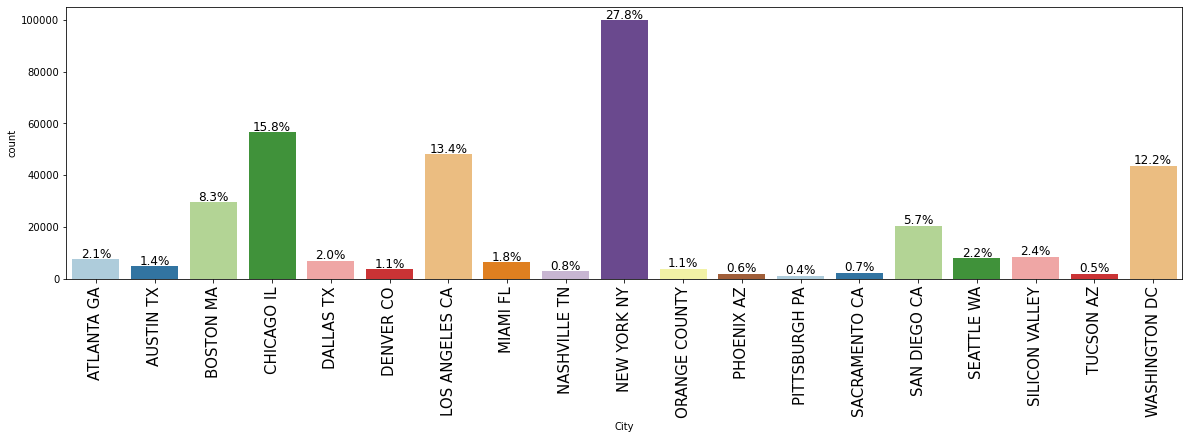

In [18]:
labeled_barplot(df3, 'City', perc=True)

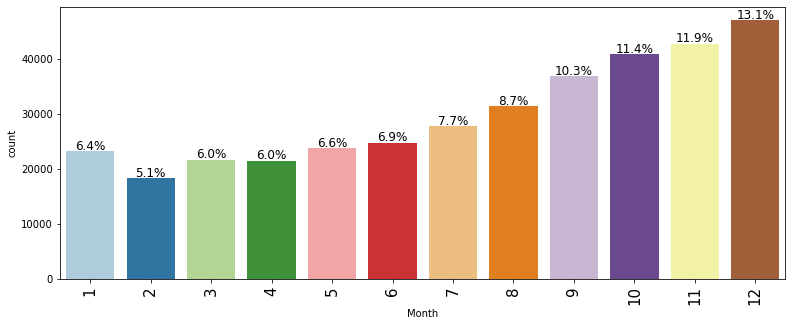

In [19]:
labeled_barplot(df3, 'Month', perc=True)

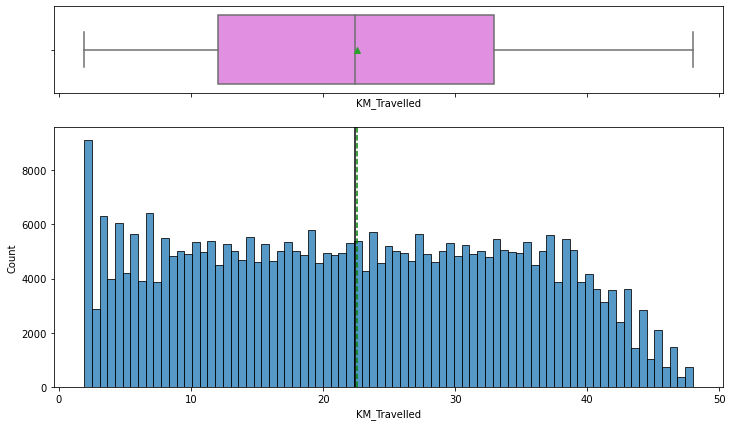

In [20]:
histogram_boxplot(df3, 'KM_Travelled')

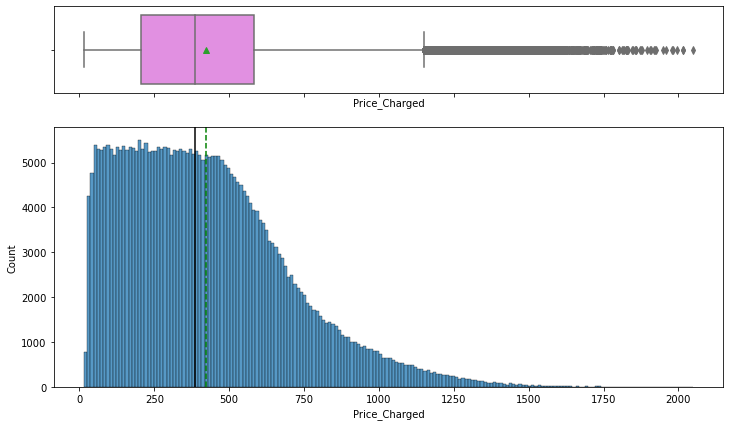

In [21]:
histogram_boxplot(df3, 'Price_Charged')

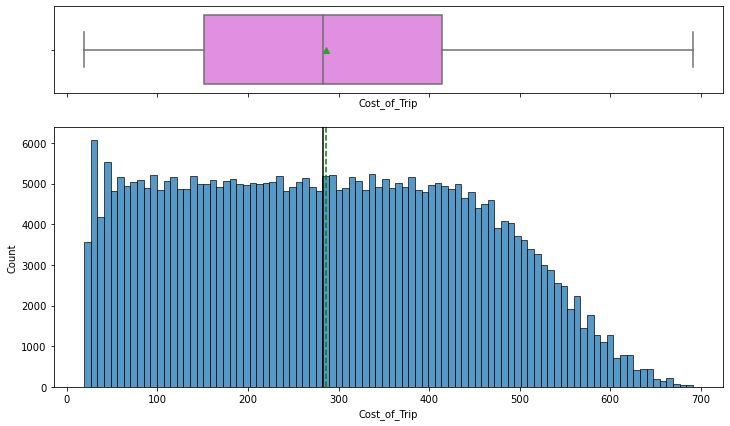

In [22]:
histogram_boxplot(df3, 'Cost_of_Trip')

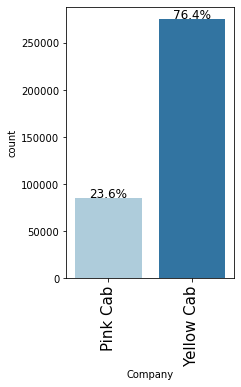

In [23]:
labeled_barplot(df3, 'Company', perc=True)

In [24]:

Total_no_Rides=df3.groupby('Company')[['KM_Travelled']].count()
Total_no_Rides

,KM_Travelled
Company,
Pink Cab,84711
Yellow Cab,274681


In [25]:
Total_KM_Travelled= df3.groupby(['Company'])[['KM_Travelled']].sum()
Total_KM_Travelled

,KM_Travelled
Company,
Pink Cab,1911073.11
Yellow Cab,6199417.47


In [26]:

Profit=df3['Price_Charged']-df3['Cost_of_Trip']

df3['Profit']=Profit

df3

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income,Population,Users,Month,Year,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card,Male,28,10813,814885,24701,1,2016,57.31
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237,814885,24701,1,2016,23.67
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash,Male,53,11242,814885,24701,1,2016,27.57
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash,Male,23,23327,814885,24701,1,2016,25.80
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card,Male,33,8536,814885,24701,1,2016,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392,Cash,Male,24,15651,418859,127001,1,2018,5.88
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286,Cash,Male,32,6528,418859,127001,1,2018,6.90
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265,Cash,Male,56,7966,418859,127001,1,2018,87.42
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175,Card,Male,32,6423,418859,127001,1,2018,32.14


In [27]:
Total_Profit= df3.groupby(['Company'])[['Profit']].sum()
Total_Profit

,Profit
Company,
Pink Cab,5307328.19
Yellow Cab,44020372.59


In [28]:
Profit_per_KM =df3['Profit']/df3['KM_Travelled']
df3['Profit_per_KM']=Profit_per_KM
df3['Profit_per_KM']= pd.to_numeric(df3['Profit_per_KM']).astype(float).round(2)
df3

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income,Population,Users,Month,Year,Profit,Profit_per_KM
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card,Male,28,10813,814885,24701,1,2016,57.31,1.88
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237,814885,24701,1,2016,23.67,0.83
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash,Male,53,11242,814885,24701,1,2016,27.57,3.05
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash,Male,23,23327,814885,24701,1,2016,25.80,0.78
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card,Male,33,8536,814885,24701,1,2016,16.84,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392,Cash,Male,24,15651,418859,127001,1,2018,5.88,1.22
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286,Cash,Male,32,6528,418859,127001,1,2018,6.90,0.82
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265,Cash,Male,56,7966,418859,127001,1,2018,87.42,3.15
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175,Card,Male,32,6423,418859,127001,1,2018,32.14,3.65


In [29]:
Total_Profit_per_KM=df3.groupby(['Company'])[['Profit_per_KM']].sum()
Total_Profit_per_KM

,Profit_per_KM
Company,
Pink Cab,234641.51
Yellow Cab,1951746.22


In [30]:
Total_no_Rides=df3.groupby('Company')[['KM_Travelled']].count()
Total_no_Rides

,KM_Travelled
Company,
Pink Cab,84711
Yellow Cab,274681


In [31]:

Avg_Profit_Company=df3.groupby('Company')['Profit'].mean()
Avg_Profit_Company

Company
Pink Cab       62.652173
Yellow Cab    160.259984
Name: Profit, dtype: float64

In [32]:
Avg_Profit_Year=df3.groupby('Year')['Profit'].mean()
Avg_Profit_Year

Year
2016    145.738477
2017    144.810773
2018    122.023265
Name: Profit, dtype: float64

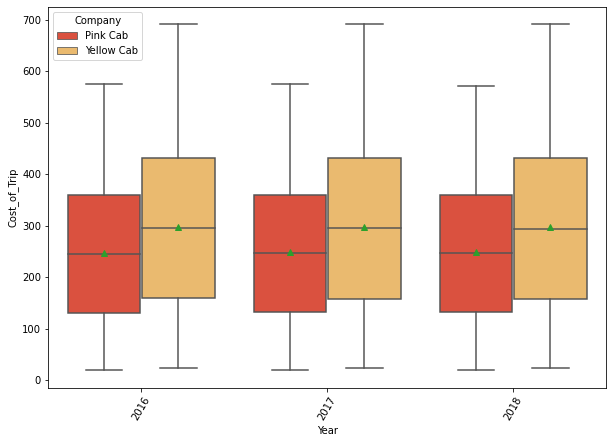

In [33]:
# Relationship between cost of trip and year
plt.figure(figsize=(10,7))
sns.boxplot(x = "Year", y = "Cost_of_Trip", data = df3, palette = 'YlOrRd_r',hue="Company",showmeans=True)
plt.xticks(rotation = 60)
plt.show()

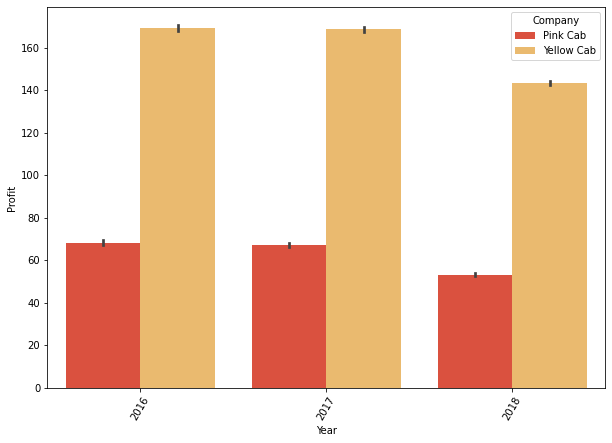

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Year", y = "Profit", data = df3, palette = 'YlOrRd_r',hue='Company')
plt.xticks(rotation = 60)
plt.show()

plt.plot(df3['Year'], df3['KM_Travelled'], color='red', marker='o')
plt.title('Age vs KM_Travelled', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('KM_Travelled', fontsize=14)
plt.grid(True)
plt.show()

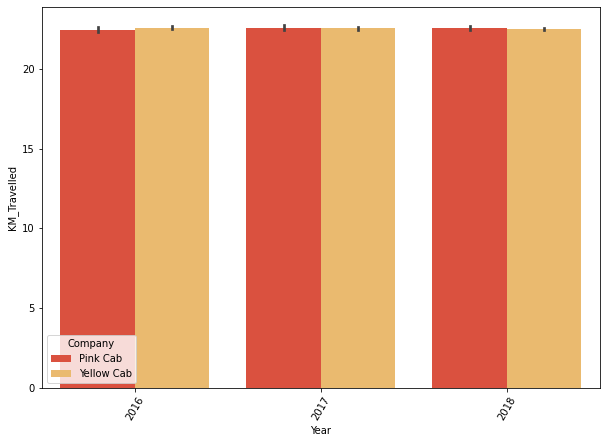

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Year", y = "KM_Travelled", data = df3, palette = 'YlOrRd_r',hue='Company')
plt.xticks(rotation = 60)
plt.show()

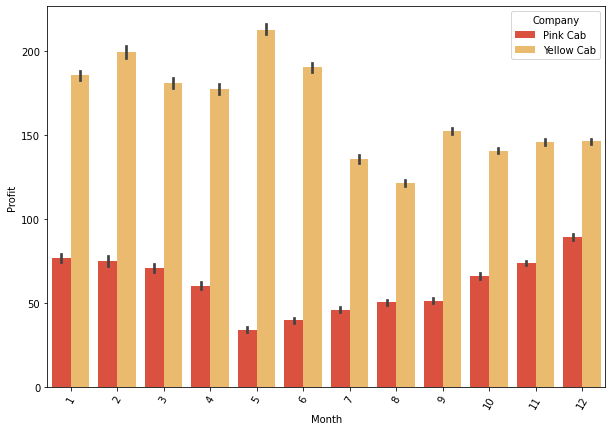

In [36]:

plt.figure(figsize=(10,7))
sns.barplot(x = "Month", y = "Profit", data = df3, palette = 'YlOrRd_r',hue='Company')
plt.xticks(rotation = 60)
plt.show()

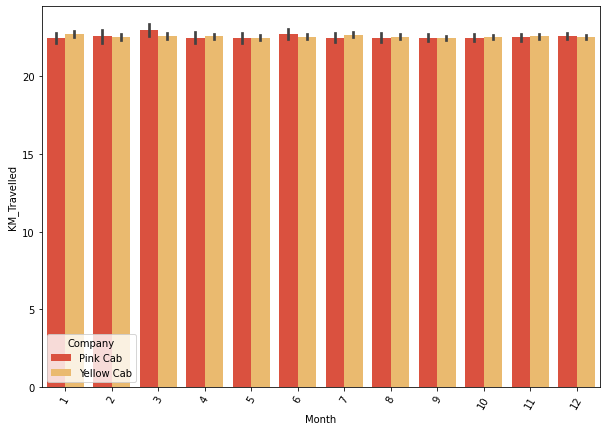

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Month", y = "KM_Travelled", data = df3, palette = 'YlOrRd_r',hue='Company')
plt.xticks(rotation = 60)
plt.show()

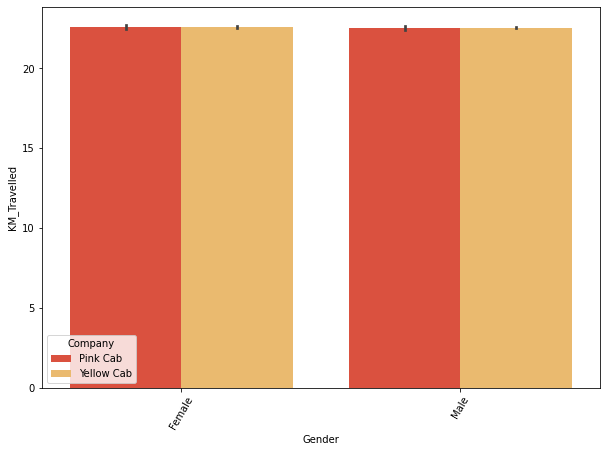

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Gender", y = "KM_Travelled", data = df3, palette = 'YlOrRd_r',hue='Company')
plt.xticks(rotation = 60)
plt.show()

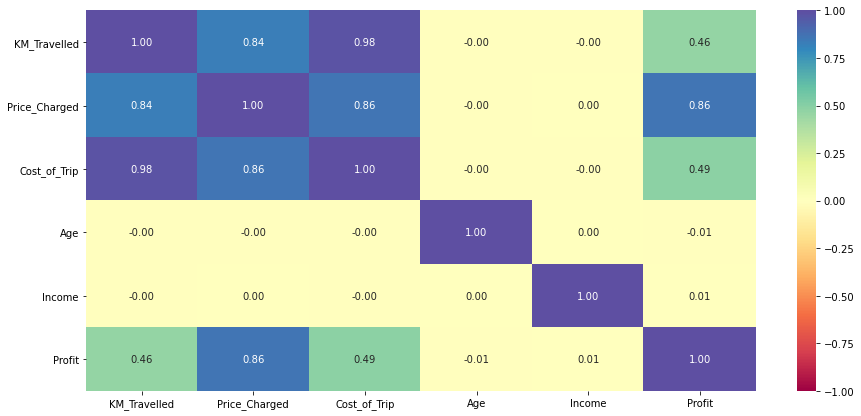

In [39]:
numeric_columns = df3.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")  # dropping year column as it is temporal variable
numeric_columns.remove("Customer_ID")
numeric_columns.remove("Transaction_ID")
numeric_columns.remove("Month")
numeric_columns.remove("Population")
numeric_columns.remove("Users")
numeric_columns.remove("Profit_per_KM")
plt.figure(figsize=(15, 7))
sns.heatmap(
    df3[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

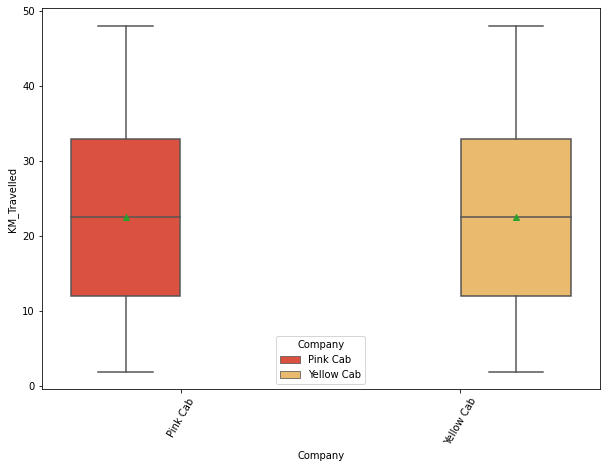

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Company", y = "KM_Travelled", data = df3, palette = 'YlOrRd_r',hue="Company",showmeans=True)
plt.xticks(rotation = 60)
plt.show()

In [41]:
Mean_KM_Travelled= df3.groupby(['Company'])[['KM_Travelled']].mean()
Mean_KM_Travelled

,KM_Travelled
Company,
Pink Cab,22.559917
Yellow Cab,22.569517


### Define the null and alternative hypotheses

 $H_0:$ : The mean of KM_Travelled on the pink cab is equal to the The mean of KM_Travelled  on the YEllow Cab

$H_a:$ The mean of KM_Travelled on the pink cab is greater than to the The mean of KM_Travelled  on the YEllow Cab

Let $\mu_1$ and $\mu_2$ be the mean KM_Travelled by  users on the Pink and Yellow page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

In [42]:
KM_Travelled_PinkCab= df3[df3['Company'] == 'Pink Cab']['KM_Travelled']
KM_Travelled_YellowCab= df3[df3['Company'] == 'Yellow Cab']['KM_Travelled']

print('The sample standard deviation of KM_Travelled on the Pink Cab is:', round(KM_Travelled_PinkCab.std(),2))
print('The sample standard deviation of KM_Travelled on the Yellow Cab is:', round(KM_Travelled_YellowCab.std(),2))

The sample standard deviation of KM_Travelled on the Pink Cab is: 12.23
The sample standard deviation of KM_Travelled on the Yellow Cab is: 12.23


In [43]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(KM_Travelled_PinkCab, KM_Travelled_YellowCab, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.5791434114938829


In [44]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.5791434114938829 is greater than the level of significance, we fail to reject the null hypothesis.


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean KM_Travelled by the users on the Pink Cab is equal to the mean KM_Travelled by the users on the Yellow Cab.

### Does the booking cab dependent on the age

### Hypotheses
$H_0:$ The cab booking  is independent of the Age.

$H_a:$ The cab booking is not independent of the Age.


In [69]:
preferred_age=pd.crosstab(df3['Age'],df3['Company'])
preferred_age


Company,Pink Cab,Yellow Cab
Age,,
18,2676,8170
19,2821,8770
20,2853,9376
21,2590,8841
22,2783,9013
23,2913,9414
24,2670,8481
25,2814,9159
26,2894,8761


In [70]:
#import the required function
from scipy.stats import chi2_contingency
# use chi2_contingency() to find the p-value
chi_2, p_value, dof, exp_freq = chi2_contingency(preferred_age)
# print the p-value
print('The p-value is', p_value)

The p-value is 4.2475625434269727e-07


As the p-value  is greater than the level of significance, we fail to reject the null hypothesis.

### Does the cost of the trip depends on the city

𝐻0: The mean of Cost of Trip on the pink cab in a city  is equal to the The mean of Cost of Trip in a city on the YEllow Cab

𝐻𝑎:
 The mean ofCost of Trip on the pink cab in a city is greater than to the Cost of Trip in a city on the YEllow Cab

Let 𝜇1 and 𝜇2 be the mean Cost of Trip in a city  on the Pink and Yellow Cab respectively.

Mathematically, the above formulated hypotheses can be written as:

𝐻0:𝜇1=𝜇2
𝐻𝑎:𝜇1>𝜇2

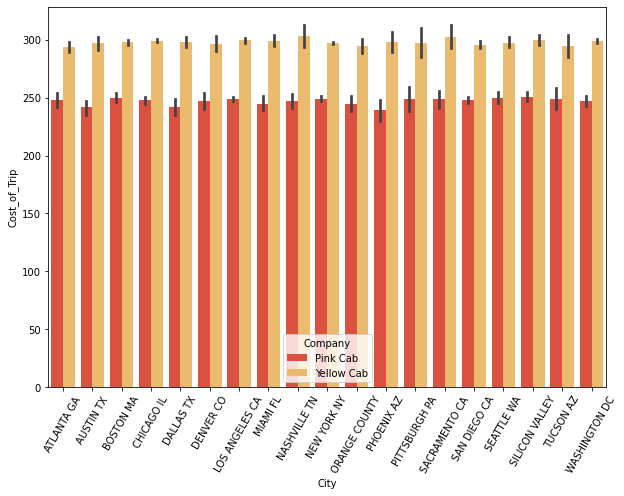

In [46]:
plt.figure(figsize=(10,7))
sns.barplot(x = "City", y = "Cost_of_Trip", data = df3, palette = 'YlOrRd_r',hue="Company")
plt.xticks(rotation = 60)
plt.show()

In [131]:


Avg_Cost_of_Trip_PinkCab=df3.groupby(['City']).apply(lambda x:x[x['Company']=='Pink Cab']['Cost_of_Trip'].mean())

Avg_Cost_of_Trip_YellowCab=df3.groupby(['City']).apply(lambda x:x[x['Company']=='Yellow Cab']['Cost_of_Trip'].mean())

Avg_Cost_of_Trip_PinkCab, Avg_Cost_of_Trip_YellowCab


(City
 ATLANTA GA        247.619580
 AUSTIN TX         241.503014
 BOSTON MA         250.030553
 CHICAGO IL        247.565828
 DALLAS TX         242.105261
 DENVER CO         247.088407
 LOS ANGELES CA    248.955131
 MIAMI FL          244.936753
 NASHVILLE TN      247.144269
 NEW YORK NY       248.856574
 ORANGE COUNTY     244.613972
 PHOENIX AZ        239.122025
 PITTSBURGH PA     248.794824
 SACRAMENTO CA     248.638681
 SAN DIEGO CA      248.165904
 SEATTLE WA        249.942258
 SILICON VALLEY    250.766595
 TUCSON AZ         249.008811
 WASHINGTON DC     247.491790
 dtype: float64,
 City
 ATLANTA GA        293.615764
 AUSTIN TX         296.999346
 BOSTON MA         297.656824
 CHICAGO IL        299.097444
 DALLAS TX         297.958364
 DENVER CO         296.382250
 LOS ANGELES CA    299.574773
 MIAMI FL          299.072460
 NASHVILLE TN      303.322130
 NEW YORK NY       296.977652
 ORANGE COUNTY     294.763244
 PHOENIX AZ        297.617075
 PITTSBURGH PA     297.456022
 SACRAMENTO

In [132]:
print('The sample standard deviation of Cost of Trip on the Pink Cab is:', round(Avg_Cost_of_Trip_PinkCab.std(),2))
print('The sample standard deviation of Cost of Trip on the Yellow Cab is:', round(Avg_Cost_of_Trip_YellowCab.std(),2))

The sample standard deviation of Cost of Trip on the Pink Cab is: 3.14
The sample standard deviation of Cost of Trip on the Yellow Cab is: 2.48


In [133]:
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(Avg_Cost_of_Trip, Avg_Cost_of_Trip, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.5


#### As the p-value 0.5 is equal tothe level of significance, we fail to reject the null hypothesis.
